<a href="https://colab.research.google.com/github/GEOFFREY-MO/Africa-Data-School/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create a list with the names called image_files
The following list has been made for you to simplify this. Note, in practice you would likely store these
files in separate folders and simply read all the files in each folder so that you could add/remove files
without editing source code.

Let us begin by importing necessary libraries

Define a function that will be used to calculate the percentages of green, blue and orange

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import io

In [ ]:
image_files = ['farm1.jpeg', 'farm2.jpeg', 'farm3.jpeg', 'farm4.jpeg',
'farm5.jpeg', 'farm6.jpeg', 'farm7.jpeg', 'farm8.jpeg',
'city1.jpeg', 'city2.jpeg', 'city3.jpeg', 'city4.jpeg',
'city5.jpeg', 'city6.jpeg', 'city7.jpeg', 'city8.jpeg',
'desert1.jpeg', 'desert2.jpeg', 'desert3.jpeg', 'desert4.jpeg',
'desert5.jpeg', 'desert6.jpeg', 'desert7.jpeg', 'desert8.jpeg']

In [ ]:
training_target = ['farm'] * 8 + ['city'] * 8 + ['desert'] * 8

In [ ]:
def retrieve_image_data(image_file):
    with open(image_file, 'rb') as f:
        image_data = f.read()
        return image_data


In [ ]:
image_data_list = []

In [ ]:
# Retrieve image data for each image file
for image_file in image_files:
    image_data = retrieve_image_data(image_file)
    image_data_list.append(image_data)

In [ ]:
def calculate_percent_colors(image_data):
    image = Image.open(io.BytesIO(image_data))
    image = image.convert('RGB')
    width, height = image.size
    pixels = list(image.getdata())
    green_pixels = sum(1 for r, g, b in pixels if g > r and g > b)
    blue_pixels = sum(1 for r, g, b in pixels if b > r and b > g)
    percent_green = green_pixels / (width * height)
    percent_blue = blue_pixels / (width * height)
    return percent_green, percent_blue


**2.Create the scatter plot in the first page Create a scatter plot**

 using the farm/city/desert image data set where each point represents an image, the x axis is the percent green in the image, and the y axis represents the percent blue. The plot should be titled with x and y axis labels,

  a different color for each of the 3 image classes, and a legend showing which class corresponds to which color. Note: this is with 24 images total, so you will likely want to find some way to automate the process of getting this data for the scatterplot. You can use a for loop to do this.
  
  Get the image file name by reading it from the image_files list from step 1. Then perform image processing to get the percent of blue and the percent of green

In [ ]:
colors = {'farm': 'green', 'city': 'blue', 'desert': 'orange'}

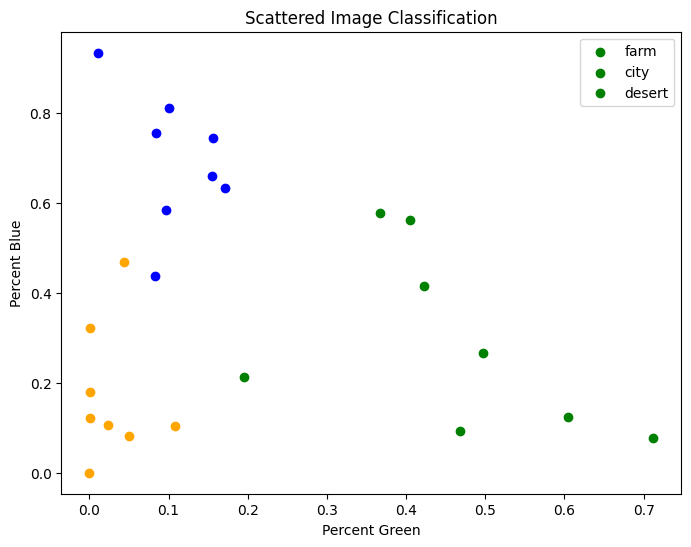

In [ ]:
plt.figure(figsize=(8, 6))

for image_data, target in zip(image_data_list, training_target):
    percent_green, percent_blue = calculate_percent_colors(image_data)
    plt.scatter(percent_green, percent_blue, color=colors[target])

plt.xlabel('Percent Green')
plt.ylabel('Percent Blue')
plt.title('Scattered Image Classification')
plt.legend(colors.keys())

plt.show()


**3. Now create an array of strings called training_target with the category of each**

Creating the training target

In [ ]:
training_target = ['farm', 'farm', 'farm', 'farm',
                   'farm', 'farm', 'farm', 'farm',
                   'city', 'city', 'city', 'city',
                   'city', 'city', 'city', 'city',
                   'desert', 'desert', 'desert', 'desert',
                   'desert', 'desert', 'desert', 'desert']


4. Create an empty array of zeros called training_data that will eventually store the percent
green and percent blue values.
You will be filling this soon. Given the needs of your data set (24 samples and 2 columns), it should
have 24 rows and 2 columns.

In [ ]:
import numpy as np

training_data = np.zeros((24, 2))


5. Now fill the training_data array with the proper values for each image, and observe the
values in the array after it is finished.
You already have the percent of blue and the percent of green for all images from step 2. Make sure
to put those two values in the proper place in the training_data array.

In [ ]:
for i, image_data in enumerate(image_data_list):
    percent_green, percent_blue = calculate_percent_colors(image_data)
    training_data[i] = [percent_green, percent_blue]

**6. Create your classifier.**


This can often be done in one line. In this case, we suggest using the k-Nearest Neighbors classifier
as shown in the tutorial (use k=1), but you can try others if you are interested

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
#train the classfier
#classifier =KNeighborsClassfier
knn.fit(training_data, training_target)
new_data_point = [0.7,0.3]
predicted_class = knn.predict([new_data_point])

print('Pridicted class:', predicted_class)

Pridicted class: ['farm']


**7. Train your classifier.**
Again, this is often only one line of code where you provide the training data and the training target to
the classifier you just created to the classifier’s ‘fit’ or ‘training’ function. For such a small data set, this
will be fast, but for larger data sets sometimes this is time consuming.
Now you have a trained classifier... great! Now we’ll set up the application for it.

In [ ]:
knn.fit(training_data,training_target)

KNeighborsClassifier(n_neighbors=3)

**8. Now create an empty test_data array and fill it with the proper values for each test image,**
and observe the filled array and consider if it matches your expectations based on your
observations of the images.
test_data should start with zeros and be 3 rows (for three test images) and 2 columns (for % green
then % blue for each image). Loop through the three test images to fill in the values of the array

In [ ]:
import numpy as np

In [ ]:
test_image_files = ['test1.jpeg','test2.jpeg','test3.jpeg']
test_data = np.zeros((3,2))

#fill in the values by looping through the test images
for i, test_image_file in enumerate(test_image_files):
  test_image_data = retrieve_image_data(test_image_file)
  percent_green, percent_blue = calculate_percent_colors(test_image_data)
  test_data[i] = [percent_green, percent_blue]


**9. Predict the class of the test images.**
Now predict the classes given the test_data array. This should only take one line of code if the
test_data array is prepared

In [ ]:
predicted_classes = knn.predict(test_data)

10. Print the prediction from the test images and compare with the actual images

Make this comparison clear in the output of your code  (e.g. prepend with ‘predicted:’ and

‘actual:’). Try to explain any errors if you note any

In [ ]:
test_target = ['farm','city','desert']
for i, test_image_file in enumerate(test_image_files):
  test_image_data = retrieve_image_data(test_image_file)
  percent_green, percent_blue = calculate_percent_colors(test_image_data)
  test_instance = np.array([[percent_green, percent_blue]])
  predicted_class = knn.predict(test_instance)[0]
  actual_class = test_target[i]
  print(f"Predicted: {predicted_class}, Actual: {actual_class}")

Predicted: desert, Actual: farm
Predicted: farm, Actual: city
Predicted: city, Actual: desert


**Explanation for the above error in our output**

We used classifier's predictions that are not matching the actual classes

This may be brought by various possible reasons like

*  using features like percent blue and percent green may not be sufficient to pridict the accurate image classes
*  The underfitting of the training data, reason being it never generalized welll to the test data.

*  Insufficient training data set to improve the classifier's accuracy








